In [ ]:
pip install scikit_learn

In [ ]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

# Loading the data


In [ ]:
tr = pd.read_csv('Train.csv')
tr.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [ ]:
ts = pd.read_csv('Test.csv')
ts.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,...,0.001757,0.000000,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,...,0.000691,0.000000,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,...,0.002253,0.000000,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,...,0.000000,0.000661,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,...,0.000000,0.000000,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754


In [ ]:
var_desc = pd.read_csv('variable_descriptions.csv')
pd.set_option('display.max_colwidth', 200) # So that we can see the full descriptions
var_desc

,Column,Description,Unnamed: 2,Unnamed: 3
0,dw_00,Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm,NaN,NaN
1,dw_01,Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials,NaN,NaN
2,dw_02,Percentage of dwellings of type: Flat or apartment in a block of flats,NaN,NaN
3,dw_03,Percentage of dwellings of type: Cluster house in complex,NaN,NaN
4,dw_04,Percentage of dwellings of type: Townhouse (semi-detached house in a complex),NaN,NaN
5,dw_05,Percentage of dwellings of type: Semi-detached house,NaN,NaN
6,dw_06,Percentage of dwellings of type: House/flat/room in backyard,NaN,NaN
7,dw_07,Percentage of dwellings of type: Informal dwelling (shack,in backyard),NaN
8,dw_08,Percentage of dwellings of type: Informal dwelling (shack,not in backyard,e.g. in an informal/squatter settlement or on a farm)
9,dw_09,Percentage of dwellings of type: Room/flatlet on a property or larger dwelling/servants quarters/granny flat,NaN,NaN


In [ ]:
ss = pd.read_csv('SampleSubmission.csv')
ss.head()

,ward,target
0,21001001: Ward 1,21.87
1,21001002: Ward 2,65.94
2,21001003: Ward 3,83.65
3,21001004: Ward 4,NaN
4,21001005: Ward 5,NaN


# UNDERSTANDING OUR DATA:

In [ ]:
tr.shape

(2822, 63)

In [ ]:
ts.shape

(1013, 62)

Missing values and datatype per column::

In [ ]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward               2822 non-null   object 
 1   total_households   2822 non-null   float64
 2   total_individuals  2822 non-null   float64
 3   target             2822 non-null   float64
 4   dw_00              2822 non-null   float64
 5   dw_01              2822 non-null   float64
 6   dw_02              2822 non-null   float64
 7   dw_03              2822 non-null   float64
 8   dw_04              2822 non-null   float64
 9   dw_05              2822 non-null   float64
 10  dw_06              2822 non-null   float64
 11  dw_07              2822 non-null   float64
 12  dw_08              2822 non-null   float64
 13  dw_09              2822 non-null   float64
 14  dw_10              2822 non-null   float64
 15  dw_11              2822 non-null   float64
 16  dw_12              2822 

In [ ]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward               1013 non-null   object 
 1   total_households   1013 non-null   float64
 2   total_individuals  1013 non-null   float64
 3   dw_00              1013 non-null   float64
 4   dw_01              1013 non-null   float64
 5   dw_02              1013 non-null   float64
 6   dw_03              1013 non-null   float64
 7   dw_04              1013 non-null   float64
 8   dw_05              1013 non-null   float64
 9   dw_06              1013 non-null   float64
 10  dw_07              1013 non-null   float64
 11  dw_08              1013 non-null   float64
 12  dw_09              1013 non-null   float64
 13  dw_10              1013 non-null   float64
 14  dw_11              1013 non-null   float64
 15  dw_12              1013 non-null   float64
 16  dw_13              1013 

Duplicates::

In [ ]:
tr.duplicated().any()

False

In [ ]:
ts.duplicated().any()

False

Histogram of the numerical values:

Since the numerical values are many I'll divide the data frame into two to avoid crowding

In [ ]:
# creating a list of first half and last of the columns in the train set:
new_list = tr.columns[:31]
next_list = tr.columns[31:]

In [ ]:
# Creating new data sets with the respective columns:
atr = tr.drop(new_list, axis=1)
btr = tr.drop(next_list, axis=1)

In [ ]:
#confirming:
atr.shape

(2822, 32)

In [ ]:
btr.shape

(2822, 31)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a67d8cdd0>,
      dtype=object)

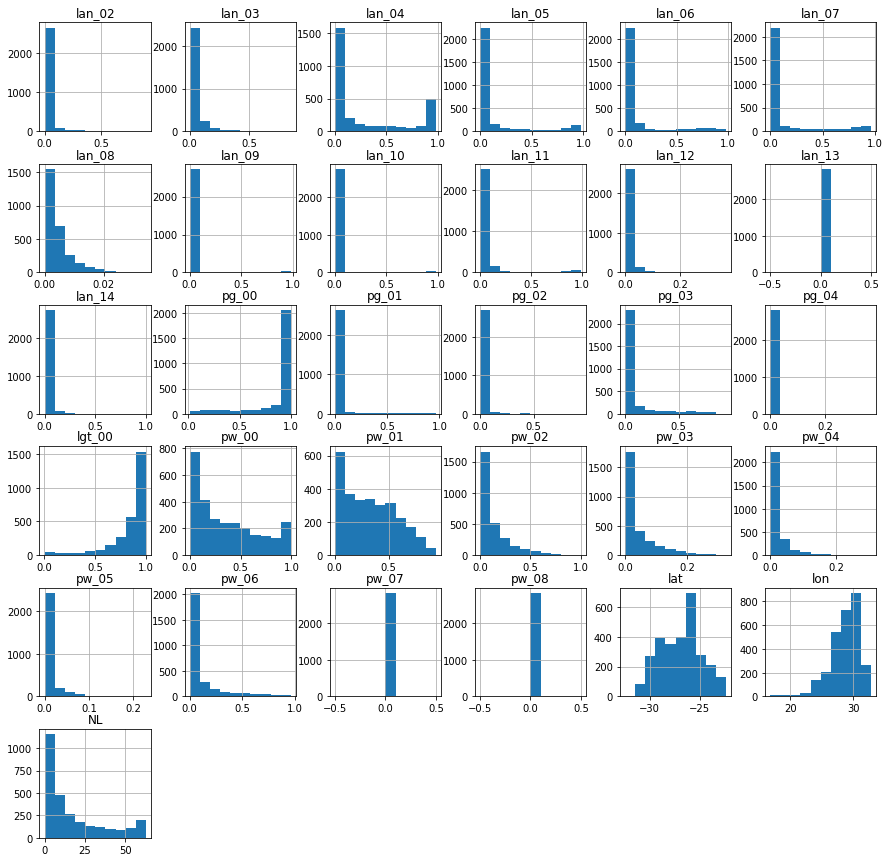

In [ ]:
# Plot histogram of numeric variables in dataset
atr.hist(figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a4d262350>,
      dtype=object)

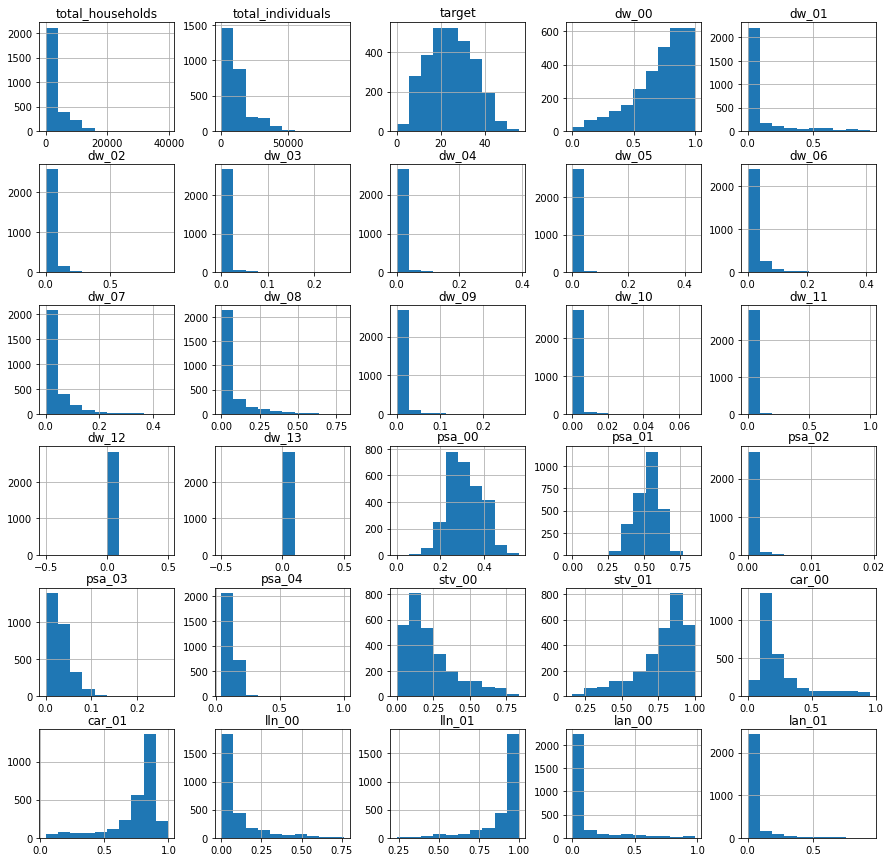

In [ ]:
# Plot histogram of numeric variables in dataset
btr.hist(figsize=(15,15))

In [ ]:
# Strong +ve correlations
tr.corr()['target'].sort_values(ascending=False).head(12)

target    1.000000
psa_00    0.782472
car_01    0.702831
stv_01    0.664181
lln_01    0.637835
pg_00     0.613346
pw_06     0.470676
dw_01     0.458206
pw_02     0.442441
pw_03     0.440941
pw_04     0.389467
pw_05     0.349653
Name: target, dtype: float64

In [ ]:
# And negative correlations
tr.corr()['target'].sort_values().head(12)

pw_00              -0.754536
psa_01             -0.707506
car_00             -0.702831
stv_00             -0.664181
lln_00             -0.637835
pg_03              -0.583908
NL                 -0.514398
lan_00             -0.507942
lan_01             -0.438704
dw_04              -0.385533
total_households   -0.374833
dw_03              -0.338137
Name: target, dtype: float64

# **DATA** **CLEANING**

In [ ]:
# Combine train and test set
ntr = tr.shape[0] # to be used to split train and test set from the combined dataframe

all_data = pd.concat((tr, ts)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (3835, 63)


**DROPPING SOME COLUMNS:**

Columns will be dropped in line with the correlation to the target variable, the results of their histogram and relevance:

*variable on the dwelling type(dw_00 to dw_13):*

They're all skewed to the left except dw_00. Those with significant correlation are dw_01(traditional) and dw_04(town house). The rest will be deleted:


In [ ]:
all_data = all_data.drop(['dw_00','dw_02','dw_03','dw_05','dw_06','dw_07','dw_08','dw_09','dw_10','dw_11','dw_12','dw_13'], axis =1)
all_data.head()

,ward,total_households,total_individuals,target,dw_01,dw_04,psa_00,psa_01,psa_02,psa_03,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.000846,0.000000,0.260191,0.607898,0.000188,0.010018,...,0.002848,0.007537,0.000000,0.012928,0.0,0.0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.001253,0.002301,0.290228,0.549788,0.000000,0.021336,...,0.014566,0.057127,0.019092,0.004131,0.0,0.0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.004517,0.007735,0.186435,0.677005,0.000489,0.021315,...,0.057560,0.010358,0.001421,0.040881,0.0,0.0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.000000,0.000813,0.281229,0.593281,0.000579,0.007249,...,0.000000,0.000669,0.000000,0.005011,0.0,0.0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.000655,0.006999,0.196687,0.517578,0.000989,0.005148,...,0.004859,0.001290,0.000673,0.017629,0.0,0.0,ZA4161005,-29.409381,25.290165,0.000000


*variable on school attendance(psa_00 to psa_04):*

psa_00(Listing as yes) and psa_01(listing as no) are almost normally distributed. The rest(don't know, unspecified and na) are skewed to the left. psa_00 and 01 have a high corrrelation to the target variable.

In [ ]:
all_data = all_data.drop(['psa_02','psa_03','psa_04'], axis =1)
all_data.head()

,ward,total_households,total_individuals,target,dw_01,dw_04,psa_00,psa_01,stv_00,stv_01,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.000846,0.000000,0.260191,0.607898,0.283468,0.716532,...,0.002848,0.007537,0.000000,0.012928,0.0,0.0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.001253,0.002301,0.290228,0.549788,0.103641,0.896359,...,0.014566,0.057127,0.019092,0.004131,0.0,0.0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.004517,0.007735,0.186435,0.677005,0.165772,0.834228,...,0.057560,0.010358,0.001421,0.040881,0.0,0.0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.000000,0.000813,0.281229,0.593281,0.087768,0.912232,...,0.000000,0.000669,0.000000,0.005011,0.0,0.0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.000655,0.006999,0.196687,0.517578,0.345975,0.654025,...,0.004859,0.001290,0.000673,0.017629,0.0,0.0,ZA4161005,-29.409381,25.290165,0.000000


*Variables on satelite tv(stv_), car(car_) and landline ownership(lln_):*

They were filled in yes or no, therefore, only one of the answers would be enough:

In [ ]:
all_data = all_data.drop(['stv_01','car_01','lln_01'], axis =1)
all_data.head()

,ward,total_households,total_individuals,target,dw_01,dw_04,psa_00,psa_01,stv_00,car_00,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.000846,0.000000,0.260191,0.607898,0.283468,0.273727,...,0.002848,0.007537,0.000000,0.012928,0.0,0.0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.001253,0.002301,0.290228,0.549788,0.103641,0.144638,...,0.014566,0.057127,0.019092,0.004131,0.0,0.0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.004517,0.007735,0.186435,0.677005,0.165772,0.272220,...,0.057560,0.010358,0.001421,0.040881,0.0,0.0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.000000,0.000813,0.281229,0.593281,0.087768,0.127875,...,0.000000,0.000669,0.000000,0.005011,0.0,0.0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.000655,0.006999,0.196687,0.517578,0.345975,0.404507,...,0.004859,0.001290,0.000673,0.017629,0.0,0.0,ZA4161005,-29.409381,25.290165,0.000000


*Variable on language(lan_00 to lan_14):*

Theyre all skewed to the leftwhile lan_13(unspecified) seems concentrated at 0. Those with reasonable correlation are lan_00(Afrikaan) at -0.51 and lan_01(English) at -0.44. The rest will be dropped:

In [ ]:
all_data = all_data.drop(['lan_02','lan_03','lan_04','lan_05','lan_06','lan_07','lan_08','lan_09','lan_10','lan_11','lan_12','lan_13','lan_14'], axis =1)
all_data.shape

(3835, 32)

*Variable on population group(pg_00 to pg_04):*

They're all skewed to the left except pg_00(Black Africans), while pg_04(other) seems concentrated at 0. 

Those with high correlation with the target variable are pg_00 at 0.61 and pg_03(White) at -0.58:

Deleting the ones with low correlation will lead to the data loosing important information.

*Variable on piped water access(pw_00 to pw_08):*

They're all skewed to the left while pw_07(unspecified) and pw_08(na) seem to be concentrated at 0. 

Those with high correlation with the target variable are:


*   pw_00(inside) at -0.75 
*   pw_06(no access) at 0.47
*   pw_02(community, a distance less than 200m) at 0.44
*   pw_03(community, a distance between 200m and 500m) at 0.44
*   pw_04(community, a distance between 500m and 1km) at 0.39
*   pw_05(community, a distance more than 1km) at 0.35

this variable seems to be relatively significant to our target.

pw_01 is inside yard



In [ ]:
def other(row):
    return row['pw_07'] + row['pw_08'] 

all_data['pw_07'] = all_data.apply(lambda row: other(row), axis=1)
all_data


,ward,total_households,total_individuals,target,dw_01,dw_04,psa_00,psa_01,stv_00,car_00,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.000846,0.000000,0.260191,0.607898,0.283468,0.273727,...,0.002848,0.007537,0.000000,0.012928,0.0,0.0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.001253,0.002301,0.290228,0.549788,0.103641,0.144638,...,0.014566,0.057127,0.019092,0.004131,0.0,0.0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.004517,0.007735,0.186435,0.677005,0.165772,0.272220,...,0.057560,0.010358,0.001421,0.040881,0.0,0.0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.000000,0.000813,0.281229,0.593281,0.087768,0.127875,...,0.000000,0.000669,0.000000,0.005011,0.0,0.0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.000655,0.006999,0.196687,0.517578,0.345975,0.404507,...,0.004859,0.001290,0.000673,0.017629,0.0,0.0,ZA4161005,-29.409381,25.290165,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,19100107: Ward 107,16076.89903,43296.51372,NaN,0.002827,0.069741,0.233077,0.612635,0.658908,0.882464,...,0.000392,0.000291,0.000148,0.002277,0.0,0.0,ZA1910107,-33.806524,18.496094,33.913055
3831,19100108: Ward 108,17470.24004,53538.12816,NaN,0.000824,0.000554,0.248120,0.577557,0.070309,0.136133,...,0.030744,0.008313,0.000348,0.022417,0.0,0.0,ZA1910108,-33.982120,18.673308,60.009486
3832,19100109: Ward 109,9467.25336,40332.11708,NaN,0.007184,0.000371,0.239656,0.534385,0.187296,0.295191,...,0.003850,0.000990,0.000352,0.010670,0.0,0.0,ZA1910109,-34.062704,18.767457,35.834860
3833,19100110: Ward 110,6111.31195,27793.92916,NaN,0.002216,0.000939,0.203364,0.530802,0.320743,0.532806,...,0.000559,0.000000,0.000204,0.026741,0.0,0.0,ZA1910110,-34.057772,18.487893,50.153301


*Other columns:*
pw_08 is now uselss to us, total_individuals doesn't look important too

In [ ]:
all_data = all_data.drop(['pw_08','total_individuals'], axis =1)
all_data.shape

(3835, 30)

# Exploratory Data Analysis:

## Looking at the target variable
The purpose of this competition is to predict the percentage of households in a ward that are woman-headed and have an annual household income of <R19,600. To put that in context, that's less than 250USD per month. 

Text(0.5, 0, 'Percentage of households that are w-headed and have income under R19.6k/month')

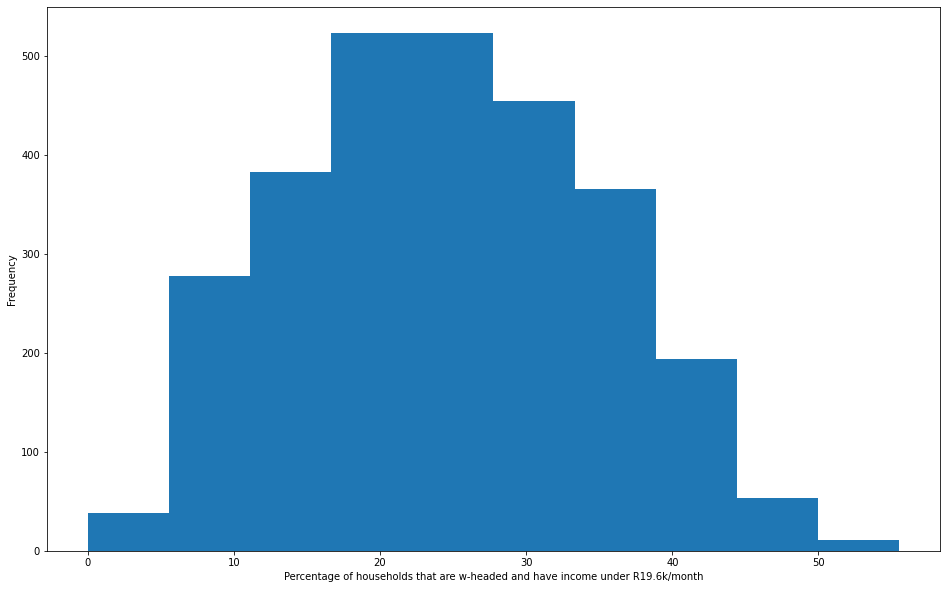

In [ ]:
# Plot the distribution
ax = df['target'].plot(kind='hist')
plt.xlabel('Percentage of households that are w-headed and have income under R19.6k/month')

# Looking at a few interesting correlations

There are some high correlations here. Let's pick a few and investigate.

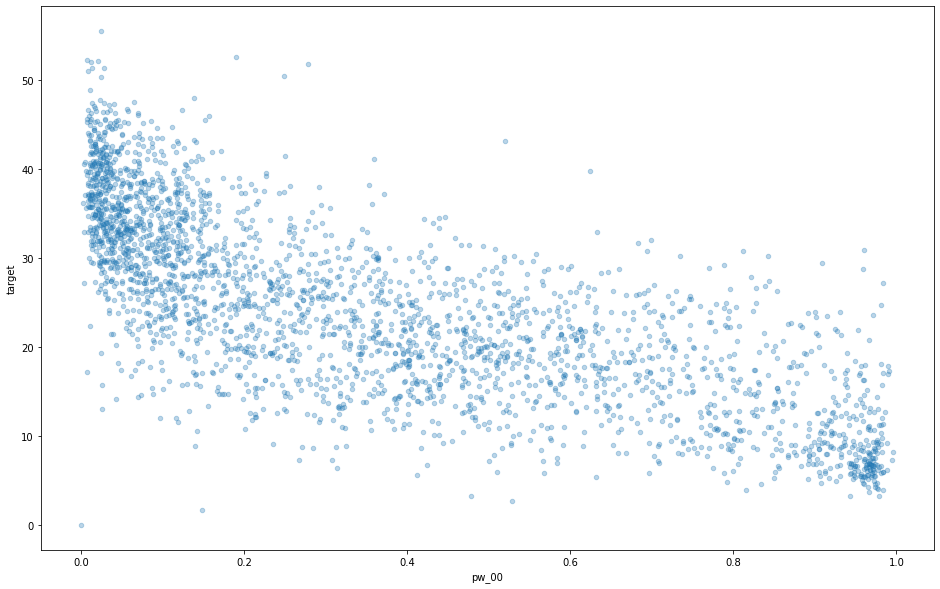

In [ ]:
# pw_00: running water in the home. Places where almost everyone has piped water tend to be more affluent.
df.plot(x='pw_00', y='target', kind='scatter', alpha=0.3)

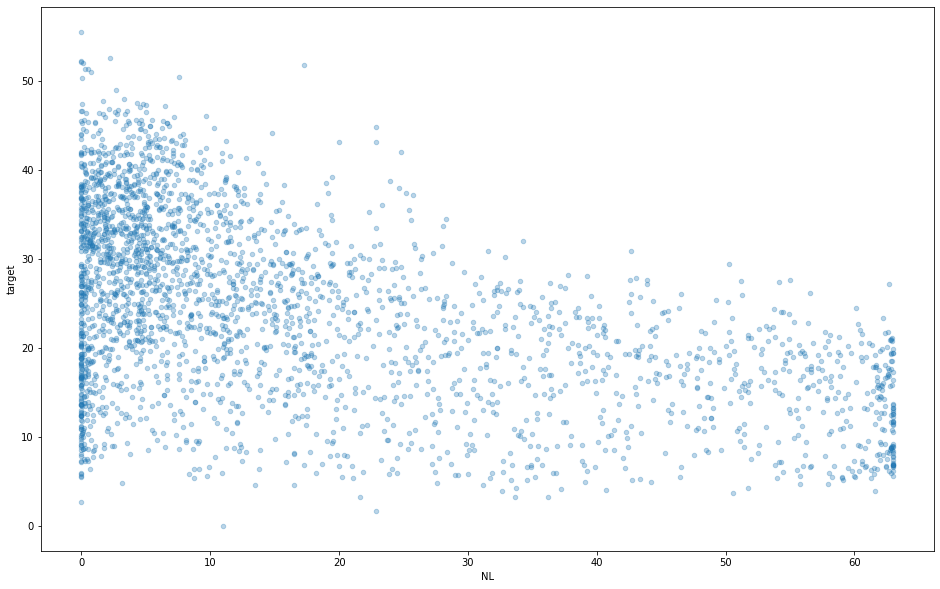

In [ ]:
# Nightlights (NL)
df.plot(x='NL', y='target', kind='scatter', alpha=0.3)

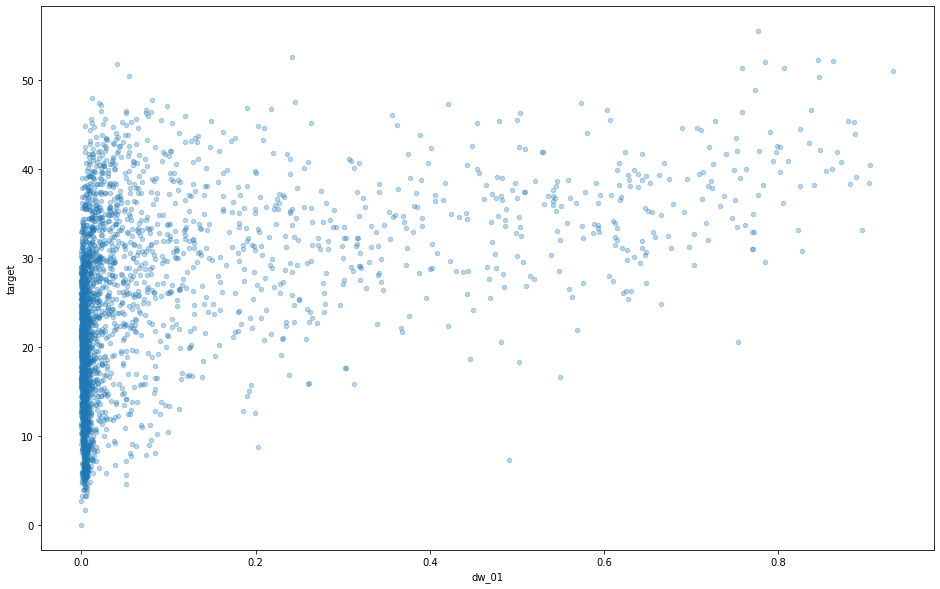

In [ ]:
# dw_01: Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials
# Places where many of the buildings are 'traditional' tend to have more households 
# in the target category. 
df.plot(x='dw_01', y='target', kind='scatter', alpha=0.3)

Notice that for the dwelling type example above, the left hand side of the graph is chaotic. Fitting a straight line would tell part of the story, but to fully capture the trend we'd have to look at this data in conjunction with info on all the other dwelling types, and think about how trends might be different in rural vs urban areas. 

### Tip -
 Take a look at more of these variables and explore their relationships further. This will give you some extra insight that may come in handy for feature engineering. It's also an interesting exercise on it's own - this is data about South Africa, and South African people. ...

# Modelling
So, in this section we'll try a simple linear model and then a more complicated Random Forest regressor, and set up a means to score our models locally (so that we don't have to keep submitting on Zindi).

In [ ]:
all_data

,ward,total_households,target,dw_01,dw_04,psa_00,psa_01,stv_00,car_00,lln_00,...,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,16.773757,0.000846,0.000000,0.260191,0.607898,0.283468,0.273727,0.118825,...,0.019968,0.002848,0.007537,0.000000,0.012928,0.0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,21.496661,0.001253,0.002301,0.290228,0.549788,0.103641,0.144638,0.066903,...,0.018946,0.014566,0.057127,0.019092,0.004131,0.0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,10.931425,0.004517,0.007735,0.186435,0.677005,0.165772,0.272220,0.100009,...,0.083010,0.057560,0.010358,0.001421,0.040881,0.0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,23.119257,0.000000,0.000813,0.281229,0.593281,0.087768,0.127875,0.029155,...,0.002689,0.000000,0.000669,0.000000,0.005011,0.0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,13.652252,0.000655,0.006999,0.196687,0.517578,0.345975,0.404507,0.133552,...,0.009699,0.004859,0.001290,0.000673,0.017629,0.0,ZA4161005,-29.409381,25.290165,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,19100107: Ward 107,16076.89903,NaN,0.002827,0.069741,0.233077,0.612635,0.658908,0.882464,0.558145,...,0.000609,0.000392,0.000291,0.000148,0.002277,0.0,ZA1910107,-33.806524,18.496094,33.913055
3831,19100108: Ward 108,17470.24004,NaN,0.000824,0.000554,0.248120,0.577557,0.070309,0.136133,0.021517,...,0.158056,0.030744,0.008313,0.000348,0.022417,0.0,ZA1910108,-33.982120,18.673308,60.009486
3832,19100109: Ward 109,9467.25336,NaN,0.007184,0.000371,0.239656,0.534385,0.187296,0.295191,0.181138,...,0.035879,0.003850,0.000990,0.000352,0.010670,0.0,ZA1910109,-34.062704,18.767457,35.834860
3833,19100110: Ward 110,6111.31195,NaN,0.002216,0.000939,0.203364,0.530802,0.320743,0.532806,0.488726,...,0.015737,0.000559,0.000000,0.000204,0.026741,0.0,ZA1910110,-34.057772,18.487893,50.153301


In [ ]:
# Separate train and test data from the combined dataframe
train = all_data[:ntr]
test = all_data[ntr:]

# Check the shapes of the split dataset
train.shape, test.shape

((2822, 30), (1013, 30))

In [ ]:
#confirming the changes:
train

,ward,total_households,target,dw_01,dw_04,psa_00,psa_01,stv_00,car_00,lln_00,...,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,16.773757,0.000846,0.000000,0.260191,0.607898,0.283468,0.273727,0.118825,...,0.019968,0.002848,0.007537,0.000000,0.012928,0.0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,21.496661,0.001253,0.002301,0.290228,0.549788,0.103641,0.144638,0.066903,...,0.018946,0.014566,0.057127,0.019092,0.004131,0.0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,10.931425,0.004517,0.007735,0.186435,0.677005,0.165772,0.272220,0.100009,...,0.083010,0.057560,0.010358,0.001421,0.040881,0.0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,23.119257,0.000000,0.000813,0.281229,0.593281,0.087768,0.127875,0.029155,...,0.002689,0.000000,0.000669,0.000000,0.005011,0.0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,13.652252,0.000655,0.006999,0.196687,0.517578,0.345975,0.404507,0.133552,...,0.009699,0.004859,0.001290,0.000673,0.017629,0.0,ZA4161005,-29.409381,25.290165,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,34503001: Ward 1,3261.68067,6.393480,0.003146,0.048888,0.249796,0.548069,0.746483,0.795676,0.197108,...,0.000472,0.000472,0.000472,0.000000,0.006203,0.0,ZA3453001,-27.675590,23.057920,9.118927
2818,34503002: Ward 2,1463.06432,15.668000,0.002262,0.003030,0.243611,0.597921,0.183194,0.293898,0.070786,...,0.003467,0.003030,0.000713,0.000000,0.008414,0.0,ZA3453002,-27.591408,22.907161,1.697395
2819,34503003: Ward 3,1395.18881,13.238795,0.006601,0.003912,0.253504,0.567502,0.353950,0.397152,0.093775,...,0.046445,0.002150,0.001458,0.000000,0.003670,0.0,ZA3453003,-27.952550,22.749698,2.792501
2820,34503004: Ward 4,1679.66964,17.639523,0.004423,0.000674,0.272915,0.551838,0.317836,0.278854,0.106750,...,0.108998,0.009235,0.007870,0.000000,0.004803,0.0,ZA3453004,-27.913875,22.755314,2.793699


In [ ]:
test = test.drop('target', axis = 1)
test 

,ward,total_households,dw_01,dw_04,psa_00,psa_01,stv_00,car_00,lln_00,lan_00,...,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,ADM4_PCODE,lat,lon,NL
2822,21001001: Ward 1,2504.95194,0.000873,0.000000,0.246694,0.615326,0.155406,0.216589,0.173569,0.817552,...,0.012457,0.001757,0.000000,0.000000,0.006649,0.0,ZA2101001,-32.637758,23.848688,0.000000
2823,21001002: Ward 2,2080.27718,0.000481,0.012323,0.193484,0.532209,0.406129,0.498555,0.366732,0.434771,...,0.009606,0.000691,0.000000,0.000000,0.002916,0.0,ZA2101002,-31.990536,24.555818,0.000000
2824,21001003: Ward 3,1106.62639,0.007937,0.001977,0.295614,0.499440,0.237233,0.190044,0.090176,0.953113,...,0.001996,0.002253,0.000000,0.000000,0.000000,0.0,ZA2101003,-32.283595,24.563940,8.269556
2825,21001004: Ward 4,2175.56096,0.002468,0.000000,0.265445,0.519198,0.343086,0.348310,0.248744,0.852038,...,0.002060,0.000000,0.000661,0.000000,0.001379,0.0,ZA2101004,-32.261612,24.542202,8.626625
2826,21001005: Ward 5,1270.83883,0.002638,0.000891,0.285008,0.552023,0.255566,0.182219,0.137765,0.965567,...,0.000787,0.000000,0.000000,0.000000,0.001660,0.0,ZA2101005,-32.251571,24.558537,8.601754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,19100107: Ward 107,16076.89903,0.002827,0.069741,0.233077,0.612635,0.658908,0.882464,0.558145,0.165559,...,0.000609,0.000392,0.000291,0.000148,0.002277,0.0,ZA1910107,-33.806524,18.496094,33.913055
3831,19100108: Ward 108,17470.24004,0.000824,0.000554,0.248120,0.577557,0.070309,0.136133,0.021517,0.037598,...,0.158056,0.030744,0.008313,0.000348,0.022417,0.0,ZA1910108,-33.982120,18.673308,60.009486
3832,19100109: Ward 109,9467.25336,0.007184,0.000371,0.239656,0.534385,0.187296,0.295191,0.181138,0.697275,...,0.035879,0.003850,0.000990,0.000352,0.010670,0.0,ZA1910109,-34.062704,18.767457,35.834860
3833,19100110: Ward 110,6111.31195,0.002216,0.000939,0.203364,0.530802,0.320743,0.532806,0.488726,0.446027,...,0.015737,0.000559,0.000000,0.000204,0.026741,0.0,ZA1910110,-34.057772,18.487893,50.153301


In [ ]:
# Define our input columns.
in_cols = tr.drop(['ward','total_households','total_individuals','target','ADM4_PCODE'], axis=1).columns
in_cols

Index(['dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07',
       'dw_08', 'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00',
       'psa_01', 'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00',
       'car_01', 'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03',
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10',
       'lan_11', 'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02',
       'pg_03', 'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04',
       'pw_05', 'pw_06', 'pw_07', 'pw_08', 'lat', 'lon', 'NL'],
      dtype='object')

In [ ]:
# Specify our target variable
ycol = 'target'

In [ ]:
# Fit a basic linear regression model, keeping the last 1000 rows for scoring
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(train[in_cols][:-1000], train[ycol][:-1000])

LinearRegression()

### Evaluating Predictions

In [ ]:
lm.score(train[in_cols][-1000:], train[ycol][-1000:]) # R2 score

0.7462060104478276

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:", sqrt(mean_squared_error(train[ycol][-1000:], lm.predict(train[in_cols][-1000:]))))

RMSE: 4.808178315021976


Yikes! That seems bad? What is going on...

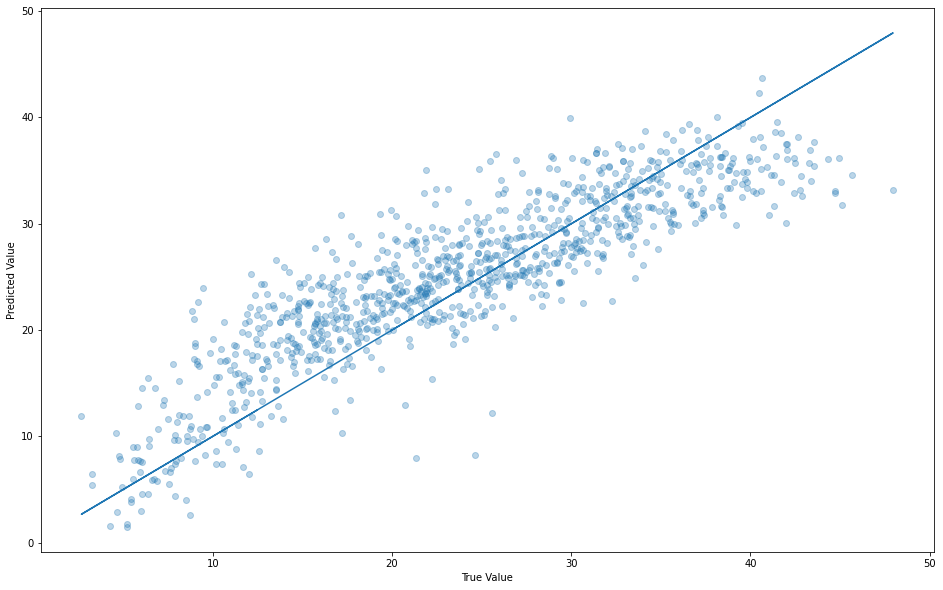

In [ ]:
# Plot predicted vs actual
plt.scatter(train[ycol][-1000:], lm.predict(train[in_cols][-1000:]), alpha=0.3)
plt.plot(train[ycol][-1000:], train[ycol][-1000:]) # A straight line - we want to be close to this
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.savefig('pred_vs_actual_quick_rf_sequential_split.png')

So the model is getting most predictions close to the mark, but some are waaaay off (causing the terrible score) and lots are negative! Let's move on to a better model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100) # My go-to quick model for regression tasks.
rf.fit(train[in_cols][:-1000], train[ycol][:-1000])

RandomForestRegressor()

In [ ]:
rf.score(train[in_cols][-1000:], train[ycol][-1000:]) # Very good!

0.8193356184807385

In [ ]:
print("RMSE:", sqrt(mean_squared_error(train[ycol][-1000:], rf.predict(train[in_cols][-1000:]))))

RMSE: 4.056730603952204


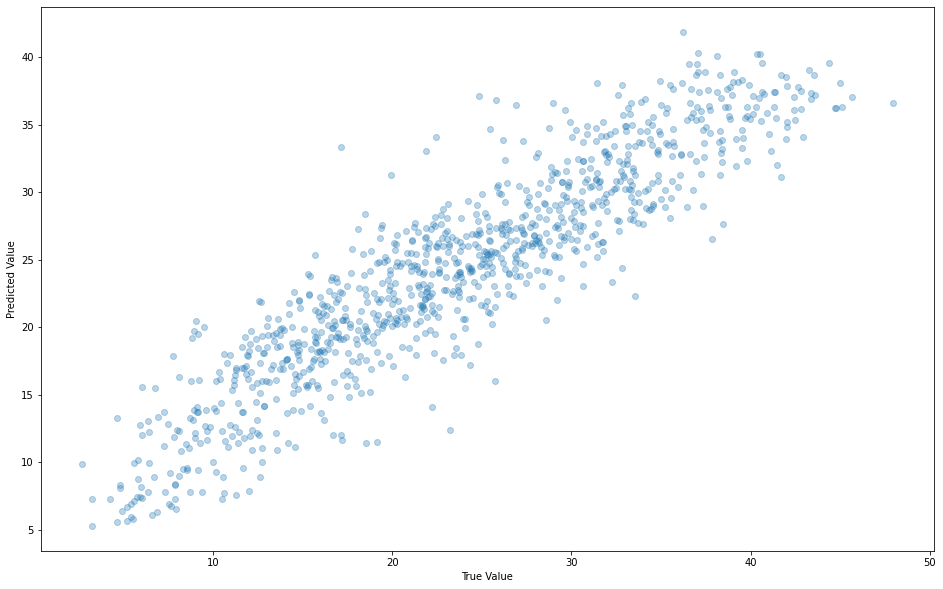

In [ ]:
plt.scatter(train[ycol][-1000:], rf.predict(train[in_cols][-1000:]), alpha=0.3)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.savefig('pred_vs_actual_quick_rf_sequential_split.png')

Much better! We can see that the predicted values now line up fairly closely with the true values. 

A nice side-effect of this Random Forest model: We can see what features are most important to the model:

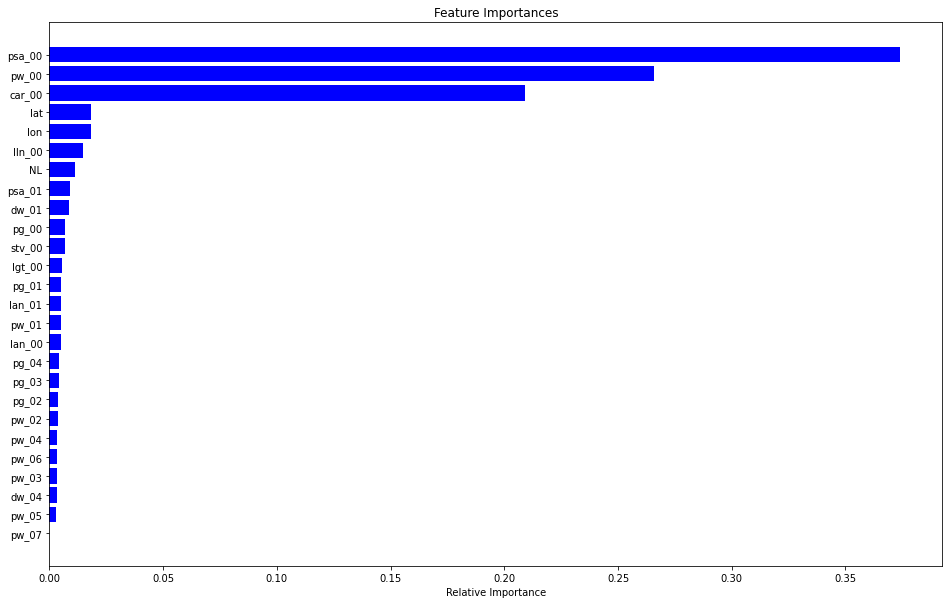

In [ ]:
features = in_cols
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

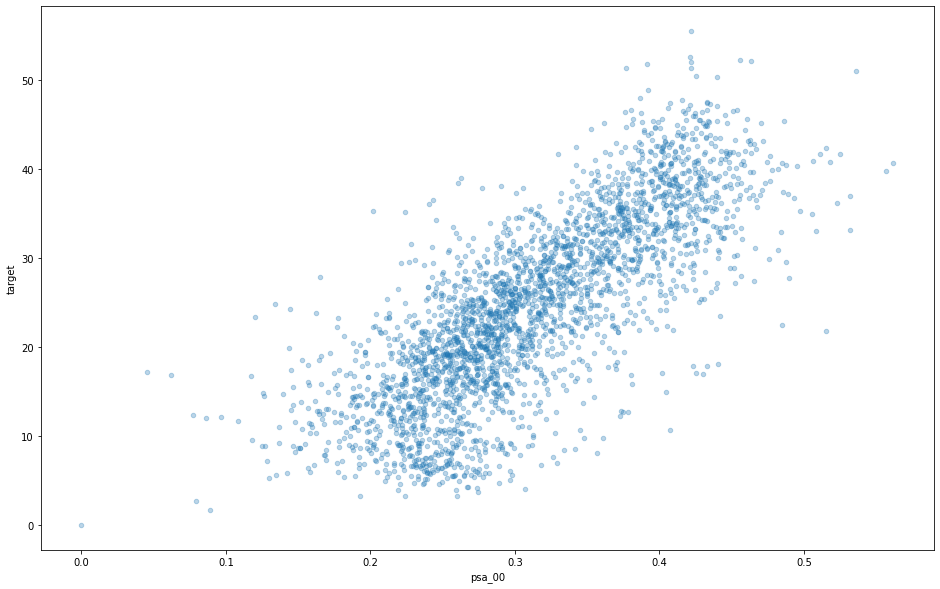

In [ ]:
# It turns out school attendance is VERY informative!
train.plot(x='psa_00', y='target', kind='scatter', alpha=0.3)

### Better scoring with Cross-Validation

We could start tweaking model parameters and trying different models, using the code above to get the score. But this gives a score for just one split - we could pick a worse model that just happens to do well on the last 1000 rows. instead, we'll use something called k-fold cross validation to get a better estimate of how well one model does in relation to another.

In [ ]:
# Define our input columns.
in_cols = train.drop(['ward','total_households','target','ADM4_PCODE'], axis=1).columns
in_cols

Index(['dw_01', 'dw_04', 'psa_00', 'psa_01', 'stv_00', 'car_00', 'lln_00',
       'lan_00', 'lan_01', 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04',
       'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06',
       'pw_07', 'lat', 'lon', 'NL'],
      dtype='object')

In [ ]:
# Specify our target variable
ycol = 'target'

In [ ]:
df = train
df

In [ ]:
df2 = test
test

In [ ]:
from sklearn.model_selection import KFold

# Demonstrating splits
#kf = KFold(n_splits=5, shuffle=False)
#for train, test in kf.split(train):
 # print(train.iloc[train].shape, train.iloc[test].shape)

In [ ]:
# Using this to test a model on 5 different splits
kf = KFold(n_splits=5, shuffle=False)

scores = []
for train, test in kf.split(tr):
  rf = RandomForestRegressor(n_estimators=100)
  rf.fit(df[in_cols].iloc[train], df[ycol].iloc[train])
  rmse = sqrt(mean_squared_error(df[ycol].iloc[test], rf.predict(df[in_cols].iloc[test])))
  scores.append(rmse)
  print(rmse)

print("Average score in 5-fold CV:", np.mean(scores))

3.916766479058102
3.476779798988928
4.576736505622495
4.279279744565735
3.876228624911976
Average score in 5-fold CV: 4.025158230629447


As you can see, the scores vary depending on the split. Taking the average of 5 runs gives a much better estimate of the total. You could go higher, but 5 should be enough to see major differences.


In [ ]:
kf = KFold(n_splits=5, shuffle=True)
scores = []
for train, test in kf.split(tr):
  rf = RandomForestRegressor(n_estimators=100)
  rf.fit(df[in_cols].iloc[train], df[ycol].iloc[train])
  rmse = sqrt(mean_squared_error(df[ycol].iloc[test], rf.predict(df[in_cols].iloc[test])))
  scores.append(rmse)
  print(rmse)

print("Average score in 5-fold CV:", np.mean(scores))

3.6572645307990683
3.7375258587913156
3.408715775791309
3.432712984702407
3.600261829446039
Average score in 5-fold CV: 3.567296195906028


# Feature Engineering and Model Tuning

Let's add a new feature and tune our model a little bit, to see if we can beat our current score (4.01).

In [ ]:
# Average household size - might contain some useful information
df['Household_Size'] = df['total_individuals']/df['total_households']

In [ ]:
in_cols = df.drop('ADM4_PCODE', axis=1).columns[4:]
in_cols # Check that the new feature is included

Index(['dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07',
       'dw_08', 'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00',
       'psa_01', 'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00',
       'car_01', 'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03',
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10',
       'lan_11', 'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02',
       'pg_03', 'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04',
       'pw_05', 'pw_06', 'pw_07', 'pw_08', 'lat', 'lon', 'NL',
       'Household_Size'],
      dtype='object')

In [ ]:
# Test in CV
kf = KFold(n_splits=5, shuffle=False)
scores = []
for train, test in kf.split(df):
  rf = RandomForestRegressor(n_estimators=100)
  rf.fit(df[in_cols].iloc[train], df[ycol].iloc[train])
  rmse = sqrt(mean_squared_error(df[ycol].iloc[test], rf.predict(df[in_cols].iloc[test])))
  scores.append(rmse)
print("Average score in 5-fold CV:", np.mean(scores))

Average score in 5-fold CV: 3.9949767051935936


A small improvement, but every little bit helps!


Let's try to tune the max_depth parameter in case our model is overfitting.

In [ ]:
for md in [3, 4, 5, 7, 9, 12, 15]:
  scores = []
  for train, test in kf.split(tr):
    rf = RandomForestRegressor(n_estimators=100, max_depth=md)
    rf.fit(df[in_cols].iloc[train], df[ycol].iloc[train])
    rmse = sqrt(mean_squared_error(df[ycol].iloc[test], rf.predict(df[in_cols].iloc[test])))
    scores.append(rmse)
  print("Average score in 5-fold CV:", np.mean(scores), "for max depth:", md)

Average score in 5-fold CV: 4.638304065579379 for max depth: 3
Average score in 5-fold CV: 4.220162291592518 for max depth: 4
Average score in 5-fold CV: 3.9840130768979876 for max depth: 5
Average score in 5-fold CV: 3.7316842807498825 for max depth: 7
Average score in 5-fold CV: 3.580182414350511 for max depth: 9
Average score in 5-fold CV: 3.5447701178916624 for max depth: 12
Average score in 5-fold CV: 3.5258766935848875 for max depth: 15


# More models::

In [ ]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
# Load regressors
svr = SVR()
xgb = XGBRegressor(objective='reg:squarederror')

#Fit models
svr.fit(tr[in_cols][:-1000], tr[ycol][:-1000])
xgb.fit(tr[in_cols][:-1000], tr[ycol][:-1000])


# Evaluate performance
# Evaluate model
print('Support Vector Regressor Performance: ')
print("RMSE:", sqrt(mean_squared_error(df[ycol][-1000:], svr.predict(tr[in_cols][-1000:]))))

print('XGBoost: ')
print("RMSE:", sqrt(mean_squared_error(df[ycol][-1000:], xgb.predict(tr[in_cols][-1000:]))))


Support Vector Regressor Performance: 
RMSE: 9.584821458170005
XGBoost: 
RMSE: 4.13014426579806


# Making a submission

In [ ]:
pd.read_csv('SampleSubmission.csv').head()

,ward,target
0,21001001: Ward 1,21.87
1,21001002: Ward 2,65.94
2,21001003: Ward 3,83.65
3,21001004: Ward 4,NaN
4,21001005: Ward 5,NaN


For each ward, we need to predict the target. Let's do it

In [ ]:
# Fit a model on the whole training set, using our best parameters
rf = RandomForestRegressor(n_estimators=100, max_depth=15)
rf.fit(df[in_cols], df[ycol])

RandomForestRegressor(max_depth=15)

In [ ]:
# Make predictions
ts['target'] = svr.predict(ts[in_cols])
ts.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL,target
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,...,0.000000,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000,28.980270
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,...,0.000000,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000,29.298824
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,...,0.000000,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556,26.550711
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,...,0.000661,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625,26.386458
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,...,0.000000,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754,26.460031


In [ ]:
# Save and submit!
ts[['ward', 'target']].to_csv('submission7.csv', index=False)

So far we have have submissions based on:
linear regression
random forest regressor
svr and xgb

the ones with an added parameter did better, while the improved random forest had the best score.